Import Necessary libraries

In [2]:
import pandas as pd
import numpy as np

Mention the path and import the data

In [3]:
path = r'D:\OneDrive\Desktop\data science\data_scraping\scrapped_wikipedia_data\companies.csv'
df = pd.read_csv(path,header=None)

Inspect about the data and understand the data

In [4]:
headers = ['Rank','Company Name','Industry','Revenue (USD millions)','Revenue growth (%)','Number of Employees','Headquarters']
df.columns = headers
df.head(5)

,Rank,Company Name,Industry,Revenue (USD millions),Revenue growth (%),Number of Employees,Headquarters
0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
2,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
3,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
4,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"


In [5]:
df.columns

Index(['Rank', 'Company Name', 'Industry', 'Revenue (USD millions)',
       'Revenue growth (%)', 'Number of Employees', 'Headquarters'],
      dtype='object')

In [6]:
df.dtypes

Rank                      object
Company Name              object
Industry                  object
Revenue (USD millions)    object
Revenue growth (%)        object
Number of Employees       object
Headquarters              object
dtype: object

In [7]:
df.describe()

,Rank,Company Name,Industry,Revenue (USD millions),Revenue growth (%),Number of Employees,Headquarters
count,101,101,101,101,101,101,101
unique,101,101,40,100,93,98,77
top,Rank,Name,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [8]:
df.info

<bound method DataFrame.info of      Rank              Company Name                    Industry  \
0    Rank                      Name                    Industry   
1       1                   Walmart                      Retail   
2       2                    Amazon  Retail and cloud computing   
3       3                ExxonMobil          Petroleum industry   
4       4                     Apple        Electronics industry   
..    ...                       ...                         ...   
96     96                  Best Buy                      Retail   
97     97      Bristol-Myers Squibb     Pharmaceutical industry   
98     98           United Airlines                     Airline   
99     99  Thermo Fisher Scientific      Laboratory instruments   
100   100                  Qualcomm                  Technology   

     Revenue (USD millions) Revenue growth (%) Number of Employees  \
0    Revenue (USD millions)     Revenue growth           Employees   
1                   611

Data Wrangling

In [9]:
#check the count of the null values present
df.isnull().sum().sum()

0

In [10]:
#convert the data types # getting an error since the csv file's first row is the headers
# so removing the first row then renaming

df.drop(index=0, inplace=True)
df.head(5)

,Rank,Company Name,Industry,Revenue (USD millions),Revenue growth (%),Number of Employees,Headquarters
1,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
2,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
3,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
4,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
5,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [11]:
# removing the comma and other symbols except digit and dot
df["Revenue (USD millions)"] = df["Revenue (USD millions)"].replace(r'[^0-9.]','',regex=True)
df["Revenue growth (%)"] = df["Revenue growth (%)"].replace(r'[^0-9.]','',regex=True)
df["Number of Employees"] = df["Number of Employees"].replace(r'[^0-9.]','',regex=True)

# convert the object to numeric type
df["Rank"] = pd.to_numeric(df["Rank"], errors="coerce")
df["Revenue (USD millions)"] = pd.to_numeric(df["Revenue (USD millions)"],errors="coerce")
df["Revenue growth (%)"] = pd.to_numeric(df["Revenue growth (%)"] , errors = "coerce")
df["Number of Employees"] = pd.to_numeric(df["Number of Employees"], errors = "coerce")

#check if any null value is present
df.head(5)

# if the value is not zero execute the below code to identify the problem
df.isnull().sum().sum()
#row_indices_with_null = df[df.isnull().any(axis=1)].index

#df["Number of Employees"] = df["Number of Employees"].astype("int")             #converting to int

0

In [12]:
df.dtypes

Rank                        int64
Company Name               object
Industry                   object
Revenue (USD millions)      int64
Revenue growth (%)        float64
Number of Employees         int64
Headquarters               object
dtype: object

REVENUE ANALYSIS

1 Which company has the highest/lowest revenue?
2 What is the average revenue across all companies?
3 How does the revenue distribution look like (e.g., using a histogram)?
4 What is the total revenue of companies in a specific industry?
5 How does revenue vary across different industries?

In [13]:
# 1 Which company has the highest/lowest revenue?
print("Maximum:\n",df.loc[df['Revenue (USD millions)'].idxmax(),['Company Name','Revenue (USD millions)']].values)
print("Minimum:\n",df.loc[df['Revenue (USD millions)'].idxmin(),['Company Name','Revenue (USD millions)']].values)

Maximum:
 ['Walmart' 611289]
Minimum:
 ['Qualcomm' 44200]


In [14]:
#2 What is the average revenue across all companies?
print("Average revenue across all companies: $", df["Revenue (USD millions)"].mean())

Average revenue across all companies: $ 117566.46


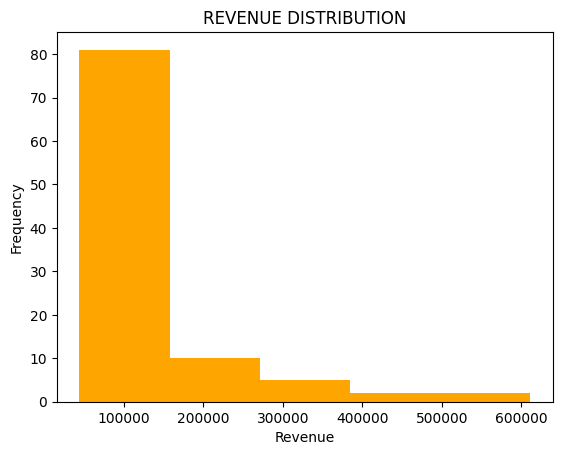

In [15]:
#3 How does the revenue distribution look like (e.g., using a histogram)?
import matplotlib.pyplot as plt
plt.title("REVENUE DISTRIBUTION")
plt.hist(df["Revenue (USD millions)"], bins=5,color="orange")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

In [16]:
# 4 What is the total revenue of companies in a specific industry?

industry_revenue = df[["Industry","Revenue (USD millions)"]]
industry_specific_revenue = pd.DataFrame(industry_revenue.groupby(["Industry"]).mean().reset_index())
industry_specific_revenue
headers = ['Industry', 'Total Revenue']
industry_specific_revenue.columns = headers

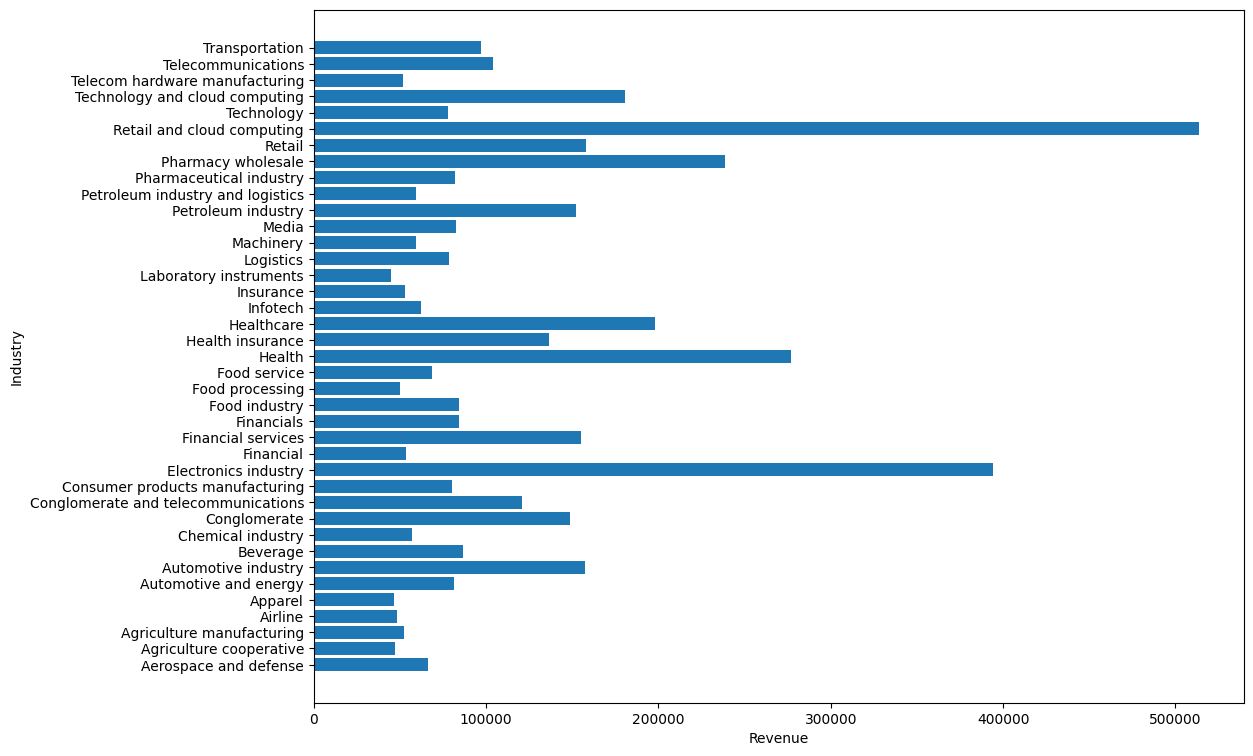

In [17]:
# 5 How does revenue vary across different industries?
plt.figure(figsize=(12,9))
plt.barh(industry_specific_revenue["Industry"],industry_specific_revenue["Total Revenue"],height=0.8)
plt.xlabel("Revenue")
plt.ylabel("Industry")
plt.show()

REVENUE GROWTH ANALYSIS

1 Which company has the highest/lowest revenue growth?
2 What is the average revenue growth across all companies?
3 Is there a correlation between revenue growth and the number of employees?
4 Which industries are experiencing the highest/lowest average revenue growth?
5 How does revenue growth differ across companies with different revenue levels?

In [18]:
#1 Which company has the highest/lowest revenue growth?
print("Highest revenue growth:\n", df.loc[df["Revenue growth (%)"].idxmax()])

Highest revenue growth:
 Rank                                       66
Company Name                        TD Synnex
Industry                             Infotech
Revenue (USD millions)                  62344
Revenue growth (%)                       97.2
Number of Employees                     28500
Headquarters              Clearwater, Florida
Name: 66, dtype: object


In [19]:
# 2 What is the average revenue growth across all companies?
print("Average Revenue Growth:",df["Revenue growth (%)"].mean())

Average Revenue Growth: 19.576


In [20]:
# 3 Is there a correlation between revenue growth and the number of employees?

cor = df[["Revenue growth (%)","Number of Employees"]].corr()
print("No correlation between the revenue growth and the number of employees")
# since the default correlation is -0.227996, so there is no correlation between the revenue growth and the number of employees


No correlation between the revenue growth and the number of employees


In [21]:
# 4 Which industries are experiencing the highest/lowest average revenue growth?

industry_growth = df[["Industry","Revenue growth (%)"]]
industry_specific_revenue_growth = pd.DataFrame(industry_growth.groupby("Industry").mean().reset_index())

print("Industry with highest average revenue growth:\n", industry_specific_revenue_growth.loc[industry_specific_revenue_growth["Revenue growth (%)"].idxmax()].values)
print("Industry with lowest average revenue growth:\n", industry_specific_revenue_growth.loc[industry_specific_revenue_growth["Revenue growth (%)"].idxmin()].values)


Industry with highest average revenue growth:
 ['Infotech' 97.2]
Industry with lowest average revenue growth:
 ['Logistics' 2.0]


  revenue levels  Revenue growth (%)
0            low           19.985393
1         medium           18.088889
2           high            8.050000


C:\Users\Dell\AppData\Local\Temp\ipykernel_10752\2047461844.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_growth_level = df.groupby("revenue levels")["Revenue growth (%)"].mean().reset_index()


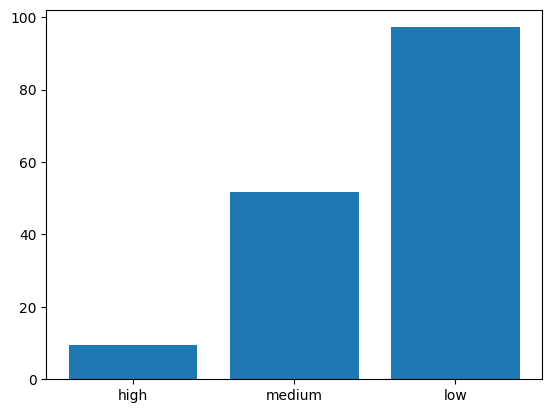

In [22]:
# 5 How does revenue growth differ across companies with different revenue levels?

import numpy as np

bins = np.linspace(min(df["Revenue (USD millions)"]),max(df["Revenue (USD millions)"]),4)
group_names = ['low','medium','high']
df["revenue levels"] = pd.cut(df["Revenue (USD millions)"], bins, labels= group_names, include_lowest=True)
revenue_growth_level = df.groupby("revenue levels")["Revenue growth (%)"].mean().reset_index()
print(revenue_growth_level)
plt.bar(df["revenue levels"],df["Revenue growth (%)"])
plt.show()


INDUSTRY ANALYSIS

1 Which industry has the most companies listed in the dataset?
2 What is the total number of employees per industry?
3 How does the average revenue per company vary across industries?
4 Are there specific industries that are more concentrated in certain headquarters locations?


In [23]:
#1 Which industry has the most companies listed in the dataset?
#industry_company = df[["Industry",["Company Name"]]]
industry_specific_companies = pd.DataFrame(df[["Industry","Company Name"]].groupby(["Industry"]).count().reset_index())
industry_specific_companies.columns = ['Industry','Number of Companies']
industry_specific_companies.loc[industry_specific_companies["Number of Companies"].idxmax()]


Industry               Financials
Number of Companies            11
Name: 15, dtype: object

In [24]:
#2 What is the total number of employees per industry?

industry_specific_employees = pd.DataFrame(df[["Industry","Number of Employees"]].groupby(["Industry"]).sum().reset_index())
print(industry_specific_employees)

                               Industry  Number of Employees
0                 Aerospace and defense               272000
1               Agriculture cooperative                10014
2             Agriculture manufacturing                82239
3                               Airline               317495
4                               Apparel                79100
5                 Automotive and energy               127855
6                   Automotive industry               340000
7                              Beverage               315000
8                     Chemical industry                37800
9                          Conglomerate               737000
10  Conglomerate and telecommunications               160700
11      Consumer products manufacturing               106000
12                 Electronics industry               164000
13                            Financial               102091
14                   Financial services               293723
15                      

                               Industry  Total Revenue
0                 Aerospace and defense   66296.000000
1               Agriculture cooperative   47194.000000
2             Agriculture manufacturing   52577.000000
3                               Airline   48169.333333
4                               Apparel   46710.000000
5                 Automotive and energy   81462.000000
6                   Automotive industry  157396.000000
7                              Beverage   86859.000000
8                     Chemical industry   56902.000000
9                          Conglomerate  148572.666667
10  Conglomerate and telecommunications  120741.000000
11      Consumer products manufacturing   80187.000000
12                 Electronics industry  394328.000000
13                            Financial   53537.500000
14                   Financial services  154792.000000
15                           Financials   84296.545455
16                        Food industry   84394.000000
17        

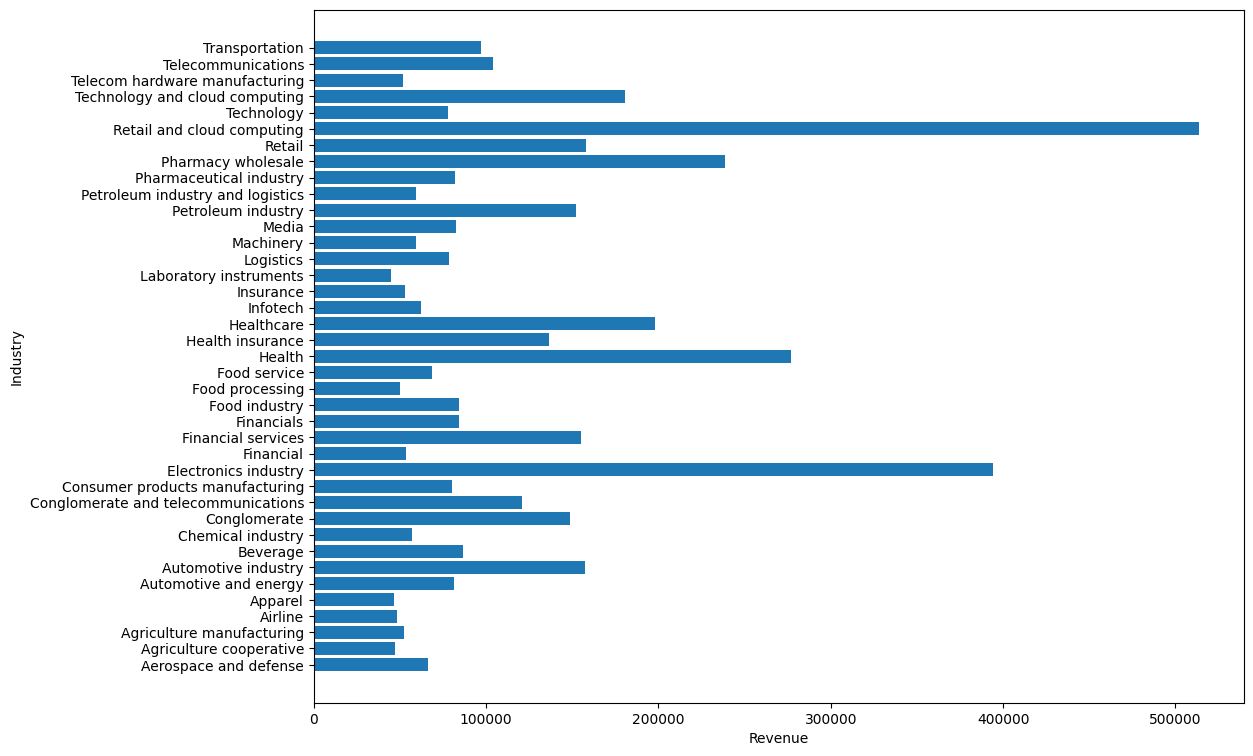

In [25]:
# 3 How does the average revenue per company vary across industries?

print(industry_specific_revenue)
plt.figure(figsize=(12,9))
plt.barh(industry_specific_revenue["Industry"],industry_specific_revenue["Total Revenue"],height=0.8)
plt.xlabel("Revenue")
plt.ylabel("Industry")
plt.show()

In [26]:
df[["Industry","Headquarters"]]

,Industry,Headquarters
1,Retail,"Bentonville, Arkansas"
2,Retail and cloud computing,"Seattle, Washington"
3,Petroleum industry,"Spring, Texas"
4,Electronics industry,"Cupertino, California"
5,Healthcare,"Minnetonka, Minnesota"
...,...,...
96,Retail,"Richfield, Minnesota"
97,Pharmaceutical industry,"New York City, New York"
98,Airline,"Chicago, Illinois"
99,Laboratory instruments,"Waltham, Massachusetts"


In [27]:
# 4 Are there specific industries that are more concentrated in certain headquarters locations?
headquarter = pd.DataFrame(df["Headquarters"].value_counts())
#print(headquarter.head())       # to understand the threshhold
industry_specific_headquarters = df.groupby(["Industry","Headquarters"]).size().reset_index(name="count") 
print(industry_specific_headquarters[industry_specific_headquarters["count"]>=2])

                   Industry             Headquarters  count
25               Financials  New York City, New York      5
46                Insurance  New York City, New York      2
54       Petroleum industry           Houston, Texas      4
64  Pharmaceutical industry  New York City, New York      2


# EMPLOYEES ANALYSIS

1 Which company has the highest/lowest number of employees?
2 What is the average number of employees per company?
3 Is there a correlation between the number of employees and the revenue of a company?
4 How does the number of employees vary across different industries?2 What is the average number of employees per company?


In [28]:
# 1 Which company has the highest/lowest number of employees?

print("Company with highest number of employees:\n ",df.loc[df["Number of Employees"].idxmax(), ["Company Name","Number of Employees"]].values)

Company with highest number of employees:
  ['Walmart' 2100000]


In [29]:
# 2 What is the average number of employees per company?
print("Average number of employees per company: ",df["Number of Employees"].mean())

Average number of employees per company:  168427.04


In [30]:
# 3 Is there a correlation between the number of employees and the revenue of a company?

employee_revenue = df[["Number of Employees", "Revenue (USD millions)"]].corr()
print("The number of employees and Revenue of a company is slightly related because the correlation coefficient is ", employee_revenue)

The number of employees and Revenue of a company is slightly related because the correlation coefficient is                          Number of Employees  Revenue (USD millions)
Number of Employees                1.000000                0.641773
Revenue (USD millions)             0.641773                1.000000


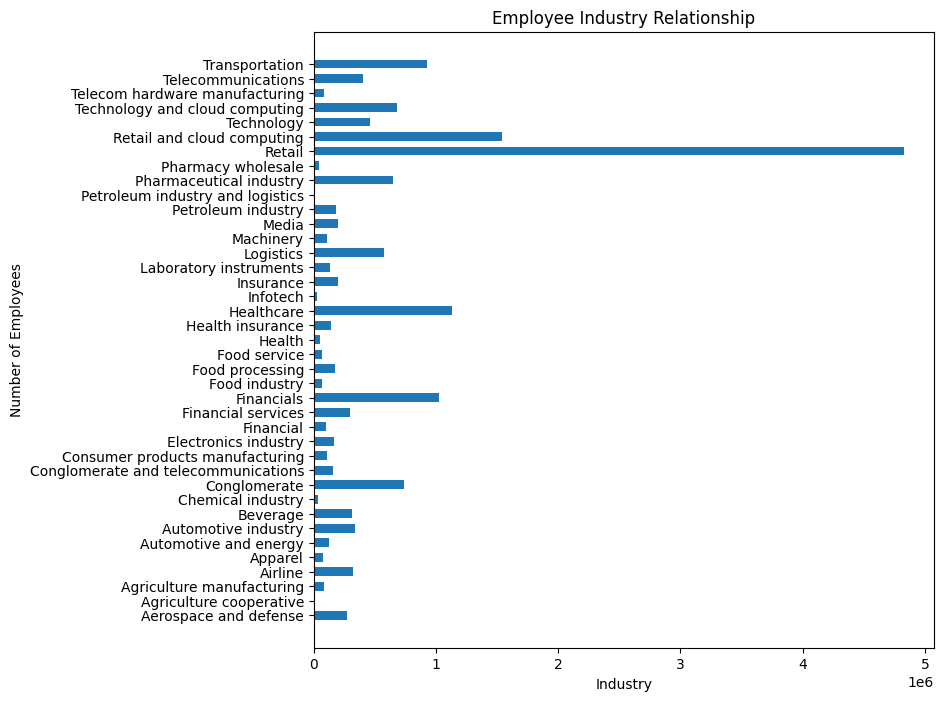

In [31]:
# 4 How does the number of employees vary across different industries?
plt.figure(figsize=(8,8))
plt.barh(industry_specific_employees["Industry"],industry_specific_employees["Number of Employees"],height=0.6)
plt.xlabel("Industry")
plt.ylabel("Number of Employees")
plt.title("Employee Industry Relationship")
plt.show()

# Headquarters Analysis

1 Which headquarters location has the most companies?

2 How does the revenue and revenue growth vary across different headquarters locations?

3 Are there certain locations where specific industries are more concentrated?

In [32]:
# 1 Which headquarters location has the most companies?

print("The Headquarters location with highest number of companies is : ",df["Headquarters"].value_counts().idxmax(),"with",df["Headquarters"].value_counts().max(),"companies")


The Headquarters location with highest number of companies is :  New York City, New York with 12 companies


                  Headquarters  Revenue (USD millions)  Revenue growth (%)
0   Arlington County, Virginia            66841.000000            5.550000
1             Armonk, New York            60530.000000           16.300000
2             Atlanta, Georgia           102774.333333           25.466667
3                Austin, Texas            81462.000000           51.400000
4            Beaverton, Oregon            46710.000000            4.900000
..                         ...                     ...                 ...
71       Stamford, Connecticut            54022.000000            4.500000
72      Waltham, Massachusetts            44915.000000           14.500000
73            Washington, D.C.           100108.000000           10.850000
74      White Plains, New York            67232.000000           13.700000
75    Woonsocket, Rhode Island           322467.000000           10.400000

[76 rows x 3 columns]


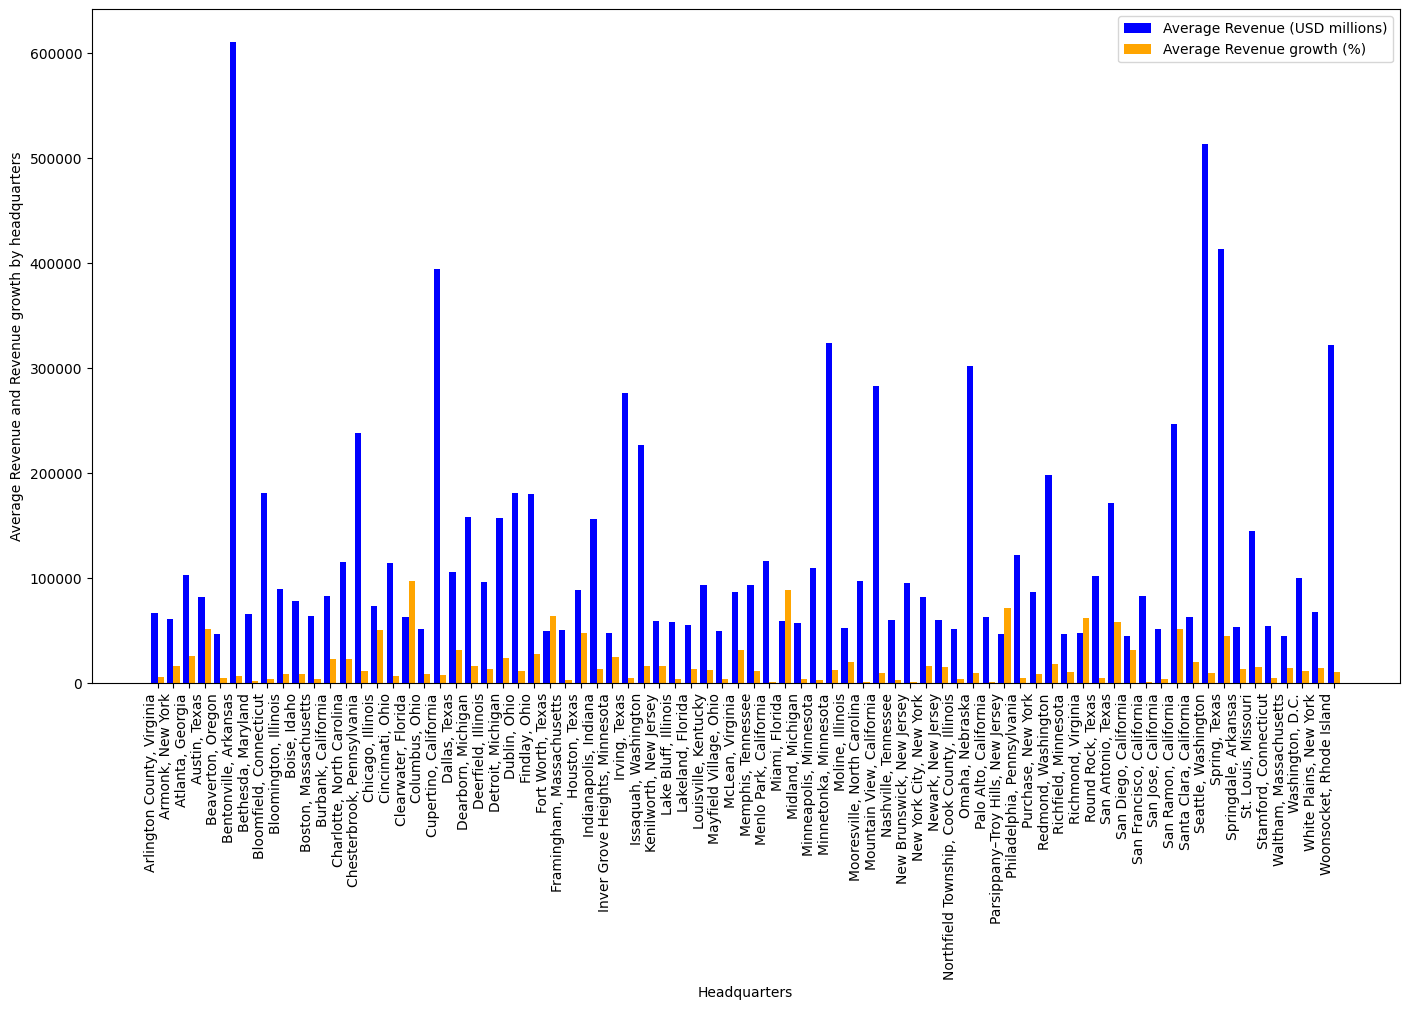

In [33]:
# 2 How does the revenue and revenue growth vary across different headquarters locations?
headquarters_revenue_growth = df.groupby("Headquarters").agg({'Revenue (USD millions)':'mean','Revenue growth (%)':'mean'}).reset_index()
print(headquarters_revenue_growth)

x=np.arange(len(headquarters_revenue_growth['Headquarters']))
fig,ax = plt.subplots(figsize=(14,10))

ax.bar(x-0.4/2, headquarters_revenue_growth['Revenue (USD millions)'], 0.4, label='Average Revenue (USD millions)', color='blue')
ax.bar(x+0.4/2, headquarters_revenue_growth['Revenue growth (%)']*1000, 0.4, label='Average Revenue growth (%)', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(headquarters_revenue_growth['Headquarters'],rotation=90,ha='right',fontsize=10)
ax.legend()

fig.tight_layout()

plt.xlabel("Headquarters")
plt.ylabel("Average Revenue and Revenue growth by headquarters")
plt.show()

<Axes: xlabel='Industry', ylabel='Headquarters'>

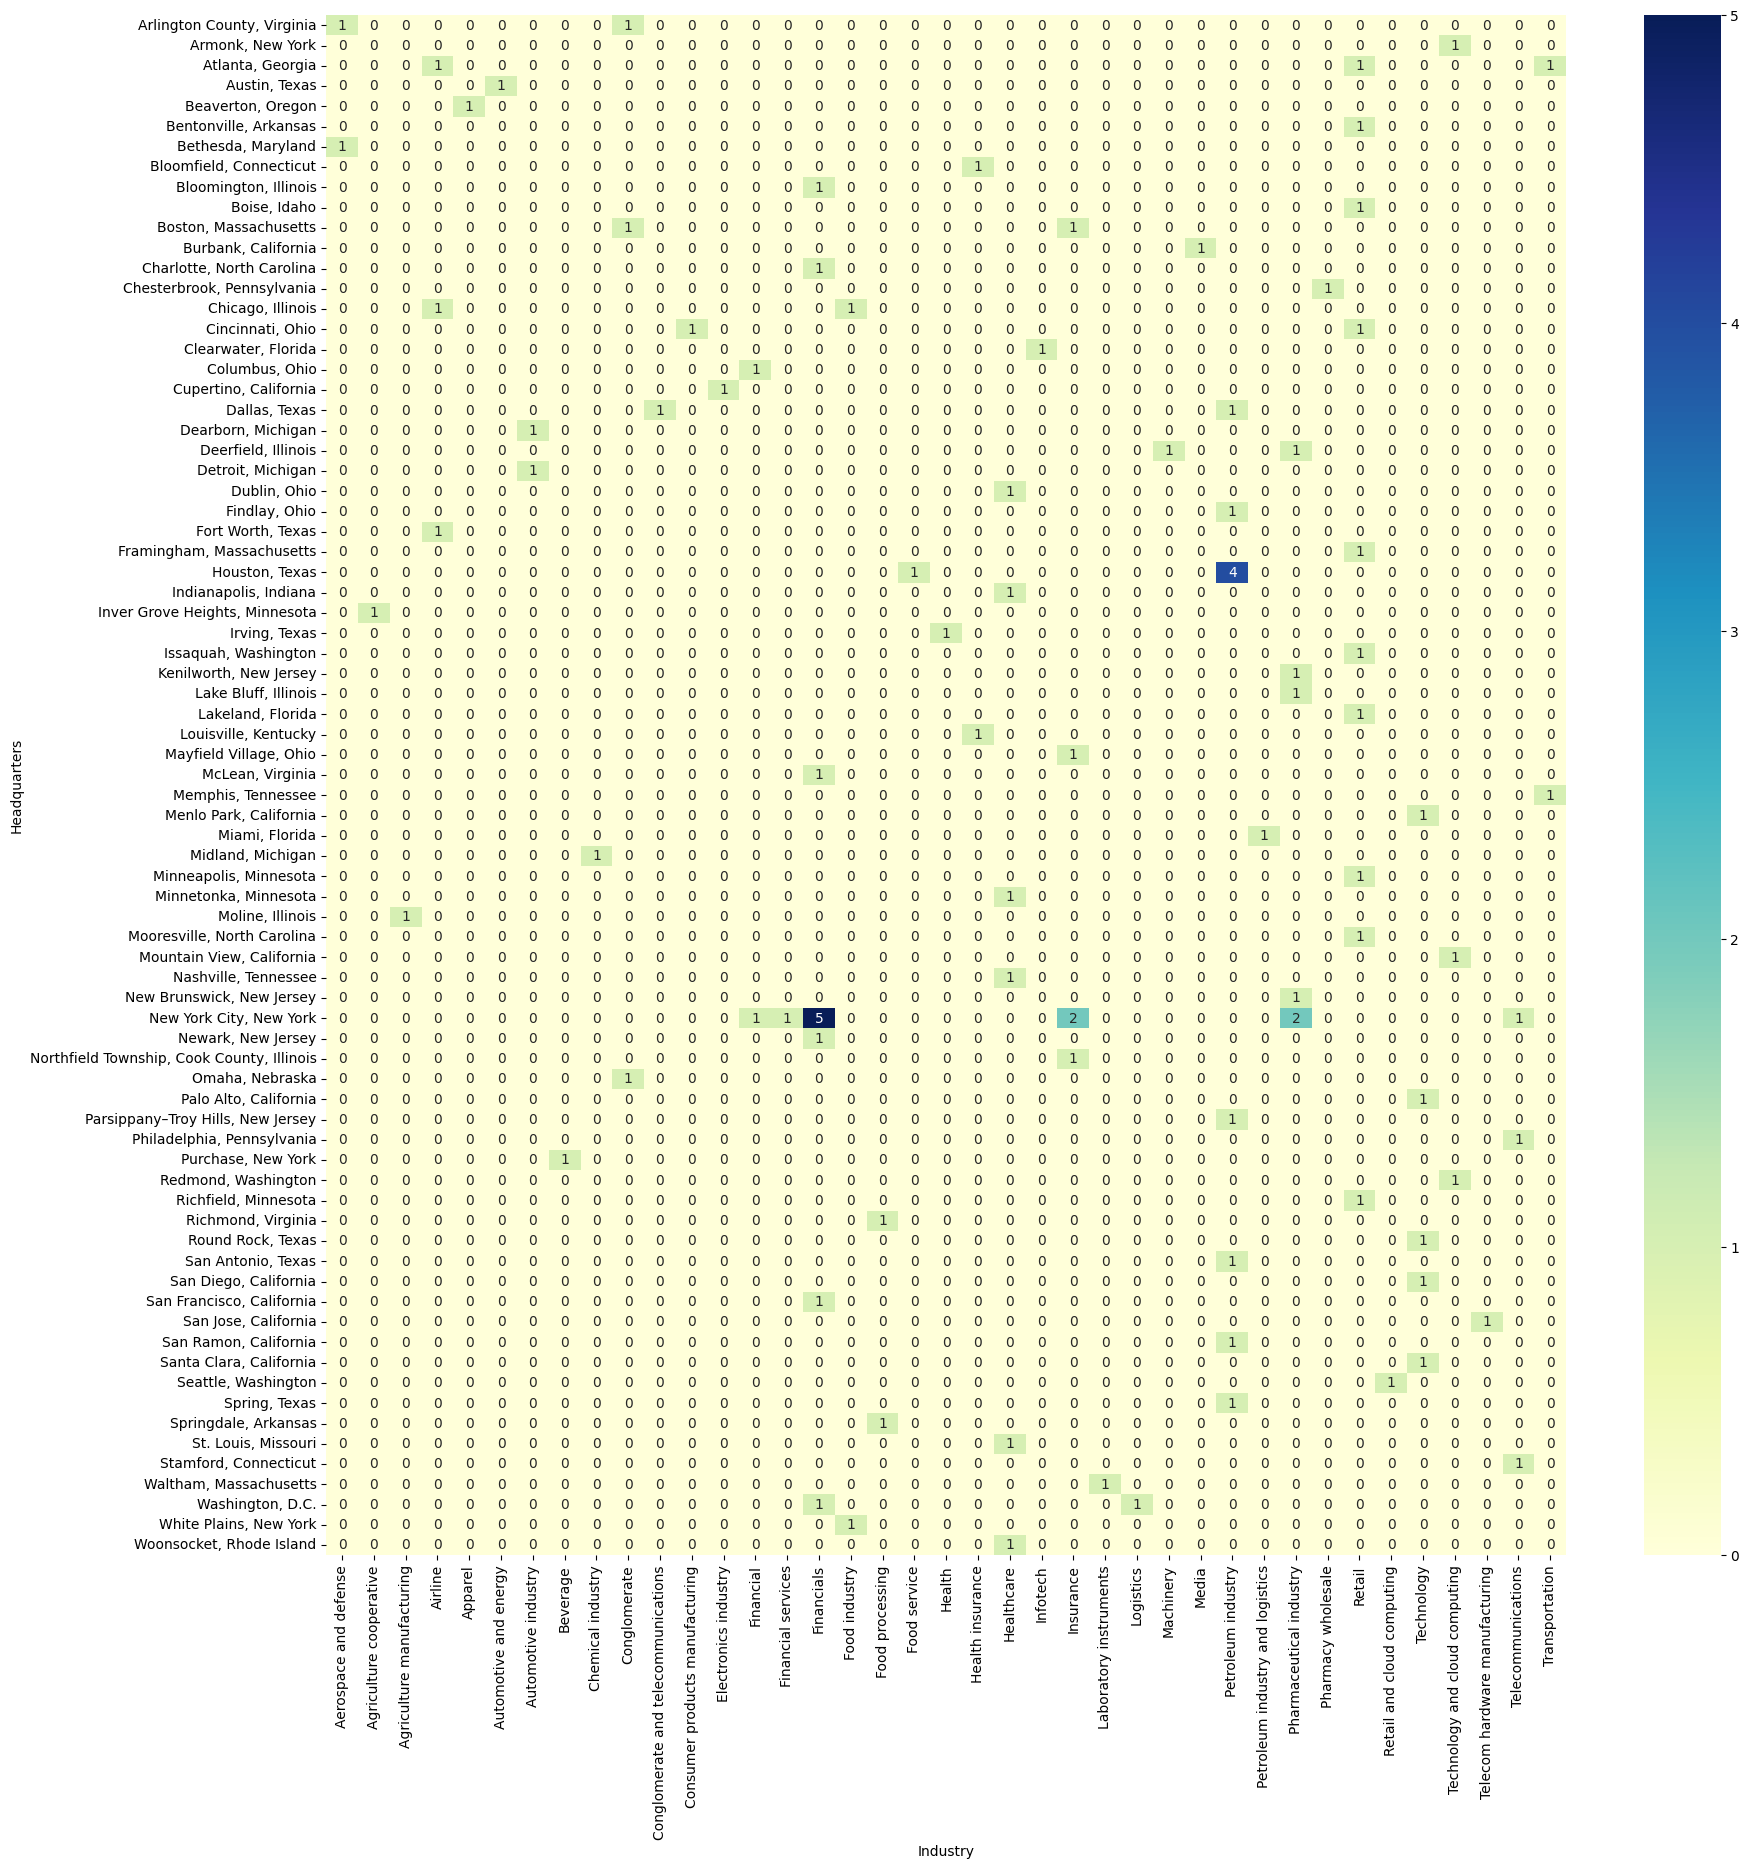

In [34]:
# 3 Are there certain locations where specific industries are more concentrated?
import seaborn as sns

headquarters_industry = df.groupby(["Headquarters","Industry"]).size().unstack(fill_value=0)
plt.figure(figsize=(20,20))
sns.heatmap(headquarters_industry,cmap="YlGnBu",annot=True)

# Rank Analysis
1 What factors contribute most to the rank of a company?

2 How does the rank correlate with revenue, revenue growth, and the number of employees?

In [35]:
# 1 What factors contribute most to the rank of a company?
from scipy import stats
p_coeff , p_value = stats.pearsonr(df['Rank'],df['Revenue (USD millions)'])
print(stats.pearsonr(df['Rank'],df['Revenue (USD millions)']))
print(df[["Rank","Revenue (USD millions)"]].corr())
print(df[["Rank","Revenue growth (%)"]].corr())

PearsonRResult(statistic=-0.7746751834836891, pvalue=3.2189819831327725e-21)
                            Rank  Revenue (USD millions)
Rank                    1.000000               -0.774675
Revenue (USD millions) -0.774675                1.000000
                        Rank  Revenue growth (%)
Rank                1.000000            0.157618
Revenue growth (%)  0.157618            1.000000


In [38]:
#2 How does the rank correlate with revenue, revenue growth, and the number of employees?

print(df[["Rank","Number of Employees"]].corr())
print(df[["Rank","Revenue growth (%)"]].corr())
print(df[["Rank","Revenue (USD millions)"]].corr())

                         Rank  Number of Employees
Rank                 1.000000            -0.352181
Number of Employees -0.352181             1.000000
                        Rank  Revenue growth (%)
Rank                1.000000            0.157618
Revenue growth (%)  0.157618            1.000000
                            Rank  Revenue (USD millions)
Rank                    1.000000               -0.774675
Revenue (USD millions) -0.774675                1.000000
